In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Extend display

# Aufgabe 1.3

## a)
Allgemeine Fragen: <br>
   - Welche Klassifikationsfehlerwahrscheinlichkeit erhält man, wenn man einen k-NNKlassifikator für k = 1 auf der gespeicherten Lern-Daten-Menge X testet?
      - 0, da es nur einen Nachbarn gibt
   - Bedeutet dies, dass der k-NN-Klassifikator auch auf neuen Datenvektoren x (welche nicht gespeichert sind) immer korrekt klassifiziert?
      - Nein, 
   - Was kann man tun um einen realistischen Schätzwert des Generalisierungsfehlers (d.h. der Klassifikationsfehlerwahrscheinlichkeit für neue Daten) zu erhalten ?
      - Indem man bekannte gelabelte Daten klassifizieren lässt und die Fehlerwahrschenilichkeit überprüft (Kreuzvalidierung)
   - Erklären Sie kurz den Begriff Kreuzvalidierung und ihren Zweck! Lesen Sie hierzu im Skript (siehe Folien zu Kapitel 2).
      - Aufteilung der Daten in S Teile, ein Teil wird zum Test genommen, die restlichen S-1 Teile werden zum Trainieren hergenommen. Es wird demnach S-mal trainiert. <br>
      
## b)
Code Review: <br>
   - Was bedeutet der Parameter S?
      - Anzahl der Teile in die die Daten aufgeteilt werden
   - Welche Rolle spielen die Variablen perm sowie Xp und Tp?
      - Permutation von Trainings- und Testdaten, Xp und Tp sind die permutierten Daten (Training / Test)
   - Welche Rolle spielt idxS?
      - idxS ist eine Liste mit dem eben permutierten Daten (über diese iteriert man S mal)
   - Was bewirkt die äußere Schleife for idxTest in idxS: ...?
      - Iterierung über alle möglichen eben erstellten Testdaten
   - Welche Rolle haben die Variablen X_learn und T_learn bzw. X_test und T_test?
      - Trainings- und Testdaten für den Classifier
   - Was passiert für S=1?
      - Es gibt nur Trainingsdaten, keine Testdaten
   - Was bewirkt die innere Schleife for i in range(len(X_test)): ...?
      - Iterierung über alle Datenvektoren, welche getestet werden sollen
   - Was bedeuten die Ergebnisse der Kreuzvalidierung pClassError und pConfErrors?
      - pClassError ist die Anzahl der Klassenfehler, pConfErrors gibt die Wahrscheinlichkeit eines Klassifizierungsfehler
      
## c)


In [2]:
import numpy as np
import scipy.spatial
from random import randint
import matplotlib 
import matplotlib.pyplot as plt 
from time import perf_counter
from V1A2_Classifier import *

In [3]:
# (i) create some synthetic data (2-dimensional Gaussian)
C=2                               # two classes
N1,N2=500,500                     # N1 and N2 data vectors for the two classes
mu1, mu2 = [1,1], [3,1]           # expectations for the two classes
sigma1 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 1
sigma2 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 2
X1 = np.random.multivariate_normal(mu1,sigma1,(N1))    # Gaussian data vectors for class 1
X2 = np.random.multivariate_normal(mu2,sigma2,(N2))    # Gaussian data vectors for class 2
T1,T2 = N1*[0],N2*[1]             # corresponding class labels 
X = np.concatenate((X1,X2))       # entire data set
T = np.concatenate((T1,T2))       # entire label set
N,D = X.shape[0], X.shape[1]      # size of data set
print("Data size: N=",N,", D=",D)

Data size: N= 1000 , D= 2



Naive KNN Classifier: 
------------------------
S= 10  fold Cross-Validation of naive  5 -NN-Classifier requires  7.9739202  seconds. Confusion error probability matrix is 
 [[0.1 0.1]
 [0.9 0.9]]
Probability of a classification error is pE =  0.5
New data vector x_test= [2 1]  is most likely from class  0 ; class probabilities are p_class =  [0.6, 0.4]
New data vector x_test= [5 1]  is most likely from class  0 ; class probabilities are p_class =  [0.0, 1.0]
New data vector x_test= [-1  1]  is most likely from class  0 ; class probabilities are p_class =  [1.0, 0.0]

Fast KNN Classifier based on KD-Trees: 
---------------------------------------


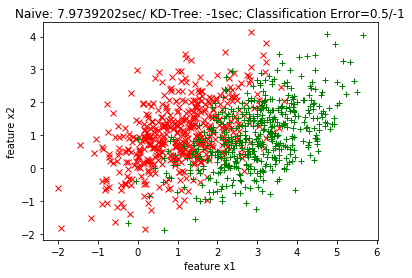

In [4]:
# (ii) create and test classifiers
k,S = 5,10                        # k=number of nearest neighbors; S=number of data subsets for cross validation
X_test = np.array([[2,1],[5,1],[-1,1]])   # Some additional data vectors to be tested 

# (ii.a) test of naive KNN classifier
print("\nNaive KNN Classifier:","\n------------------------")
knnc = KNNClassifier(C,k)         # create classifier object of class KNNClassifier
t1=perf_counter()                        # start time     
pE_naive,pCE_naive = knnc.crossvalidate(S,X,T) # do S-fold cross validation for data X,T
t2=perf_counter()                        # end time
t_naive=t2-t1                     # wall time required by the naive KNN algorithmus (in seconds)
print("S=", S, " fold Cross-Validation of naive ", k, "-NN-Classifier requires ", t_naive, " seconds. Confusion error probability matrix is \n", pCE_naive)
print("Probability of a classification error is pE = ", pE_naive)
knnc.fit(X,T)                     # train classifier with whole data set
for x_test in X_test:             # Test some additional data vectors x_test from X_test         
    t_test,p_class,idxNN = knnc.predict(x_test,k)
    print("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)

# (ii.b) test of KD-tree KNN classifier
print("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
t_kdtree,pE_kdtree,pCE_kdtree=-1,-1,-1      # REPLACE BY YOUR OWN CODE

# (iii) plot data
f=plt.figure()
a = f.add_subplot(111)
a.plot(X1.T[0],X1.T[1],'rx')               # plot data vectors of class 1
a.plot(X2.T[0],X2.T[1],'g+')               # plot data vectors of class 2
a.set_xlabel('feature x1');
a.set_ylabel('feature x2');
a.set_title('Naive: '+str(t_naive)+'sec/ KD-Tree: '+str(t_kdtree)+'sec; Classification Error='+str(pE_naive)+'/'+str(pE_kdtree));

plt.show()